In [35]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metric_by_feature_extraction(df, models, metric='AUC', show_eval=True, show_train=True, show_random=False, maximise_metric=True):
    df['Feature_extraction_method'] = df['search_term'].apply(lambda x: x.split('_', 1)[1])
    df["Feature_extraction_method"] = df["Feature_extraction_method"].apply(
    lambda x: "_".join(x.split("_")[:-2]))
    # Display unique values to verify the result
    df["Feature_extraction_method"].unique()
    if maximise_metric:
        best_model_train_score = 0
        best_model_eval_score = 0
    else:
        best_model_train_score = np.inf
        best_model_eval_score = np.inf
    best_train_search_term = ""
    best_eval_search_term = ""
    feature_extraction_methods = df['Feature_extraction_method'].unique()
    
    # Define a color palette for models
    color_palette = sns.color_palette('tab10', len(models))
    model_colors = dict(zip(models, color_palette))

    # Generate plots for each feature extraction method with matching colors for solid and dotted lines
    for method in feature_extraction_methods:
        
        # Filter data for the current feature extraction method
        method_df = df[df['Feature_extraction_method'] == method]
        
        # Group by model type, percentage of data, and eval/train, then calculate mean metrics
        grouped_method_df = method_df.groupby(
            ["percentage_of_data", "model_type", "eval_or_train", "search_term"]
        )[[metric]].mean().reset_index()

        # Create the plot
        plt.figure(figsize=(12, 6))
        grouped_method_df_train = grouped_method_df[grouped_method_df["eval_or_train"] == "train"]
        grouped_method_df_eval = grouped_method_df[grouped_method_df["eval_or_train"] == "eval"]

        # Plot lines for each model type
        for model in models:
            if show_random == False and model == 'Random':
                continue

            train_data = grouped_method_df_train[grouped_method_df_train['model_type'] == model]
            eval_data = grouped_method_df_eval[grouped_method_df_eval['model_type'] == model]

            # Use the same color for both train and eval lines
            color = model_colors[model]

            # Plot train data (solid line)
            if show_train:
                plt.plot(train_data['percentage_of_data'], train_data[metric], label=f'{model} (train)', linestyle='-', color=color)

            # Plot eval data (dotted line) if enabled
            if show_eval:
                plt.plot(eval_data['percentage_of_data'], eval_data[metric], label=f'{model} (eval)', linestyle='--', color=color)
            
            # Update best model scores
            if maximise_metric:
                if train_data[metric].max() > best_model_train_score:
                    best_model_train_score = train_data[metric].max()
                    best_train_search_term = train_data[train_data[metric] == best_model_train_score].iloc[0]['search_term']
                if eval_data[metric].max() > best_model_eval_score:
                    best_model_eval_score = eval_data[metric].max()
                    best_eval_search_term = eval_data[eval_data[metric] == best_model_eval_score].iloc[0]['search_term']
            else:
                if train_data[metric].min() < best_model_train_score:
                    best_model_train_score = train_data[metric].min()
                    best_train_search_term = train_data[train_data[metric] == best_model_train_score].iloc[0]['search_term']
                if eval_data[metric].min() < best_model_eval_score:
                    best_model_eval_score = eval_data[metric].min()
                    best_eval_search_term = eval_data[eval_data[metric] == best_model_eval_score].iloc[0]['search_term']

        # Customize the plot
        plt.xlabel('Percentage of Data')
        plt.ylabel(f'Mean {metric.replace("_", " ")}')
        plt.title(f'{metric.replace("_", " ")} vs Percentage of Data by Model - Feature Extraction: {method}')
        plt.legend(loc='best')
        plt.grid(True)

        # Display the plot
        plt.show()

    print(f"Best model train score: {best_model_train_score} with search term: {best_train_search_term}")
    print(f"Best model eval score: {best_model_eval_score} with search term: {best_eval_search_term}")


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metric_by_feature_extraction(df, models, metric='AUC', show_eval=True, show_train=True, show_random=False, compare_models=(), tag="", maximise_metric=True):
    df['Feature_extraction_method'] = df['search_term'].apply(lambda x: x.split('_', 1)[1])
    df["Feature_extraction_method"] = df["Feature_extraction_method"].apply(lambda x: "_".join(x.split("_")[:-2]))
    df["Feature_extraction_method"].unique()
    
    if maximise_metric:
        best_model_train_score = 0
        best_model_eval_score = 0
    else:
        best_model_train_score = np.inf
        best_model_eval_score = np.inf
    best_train_search_term = ""
    best_eval_search_term = ""
    feature_extraction_methods = df['Feature_extraction_method'].unique()

    # Define a color palette for models
    color_palette = sns.color_palette('tab10', len(models))
    model_colors = dict(zip(models, color_palette))

    for method in feature_extraction_methods:
        method_df = df[df['Feature_extraction_method'] == method]
        
        grouped_method_df = method_df.groupby(
            ["percentage_of_data", "model_type", "eval_or_train", "search_term"]
        )[[metric]].mean().reset_index()

        plt.figure(figsize=(12, 6))
        grouped_method_df_train = grouped_method_df[grouped_method_df["eval_or_train"] == "train"]
        grouped_method_df_eval = grouped_method_df[grouped_method_df["eval_or_train"] == "eval"]

        for model in models:
            if not show_random and model == 'Random':
                continue

            train_data = grouped_method_df_train[grouped_method_df_train['model_type'] == model]
            eval_data = grouped_method_df_eval[grouped_method_df_eval['model_type'] == model]
            color = model_colors[model]
            if show_train:
                plt.plot(train_data['percentage_of_data'], train_data[metric], label=f'{model} (train)', linestyle='-', color=color)
            if show_eval:
                plt.plot(eval_data['percentage_of_data'], eval_data[metric], label=f'{model} (eval)', linestyle='--', color=color)
            if maximise_metric:
                if not train_data.empty and train_data[metric].max() > best_model_train_score:
                    best_model_train_score = train_data[metric].max()
                    best_train_search_term = train_data[train_data[metric] == best_model_train_score].iloc[0]['search_term']
                if not eval_data.empty and eval_data[metric].max() > best_model_eval_score:
                    best_model_eval_score = eval_data[metric].max()
                    best_eval_search_term = eval_data[eval_data[metric] == best_model_eval_score].iloc[0]['search_term']
            else:
                if not train_data.empty and train_data[metric].min() < best_model_train_score:
                    best_model_train_score = train_data[metric].min()
                    best_train_search_term = train_data[train_data[metric] == best_model_train_score].iloc[0]['search_term']
                if not eval_data.empty and eval_data[metric].min() < best_model_eval_score:
                    best_model_eval_score = eval_data[metric].min()
                    best_eval_search_term = eval_data[eval_data[metric] == best_model_eval_score].iloc[0]['search_term']

        plt.xlabel('Percentage of Data')
        plt.ylabel(f'Mean {metric.replace("_", " ")}')
        plt.title(f'{tag}: {metric.replace("_", " ")} vs Percentage of Data by Model - Feature Extraction: {method}')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

        # If model comparison is defined, create a difference plot
        if compare_models:
            model1, model2 = compare_models
            if show_eval:
                data_model1 = grouped_method_df_eval[grouped_method_df_eval['model_type'] == model1]
                data_model2 = grouped_method_df_eval[grouped_method_df_eval['model_type'] == model2]

                if not data_model1.empty and not data_model2.empty:
                    diff_data = data_model1.merge(data_model2, on='percentage_of_data', suffixes=('_1', '_2'))
                    diff_data['metric_difference'] = diff_data[f'{metric}_1'] - diff_data[f'{metric}_2']

                    plt.figure(figsize=(10, 5))
                    plt.plot(diff_data['percentage_of_data'], diff_data['metric_difference'], marker='o', linestyle='-', color='red')
                    plt.xlabel('Percentage of Data')
                    plt.ylabel(f'Difference in {metric.replace("_", " ")}')
                    plt.title(f'Difference in EVAL {metric.replace("_", " ")} between {model1} and {model2} - Feature Extraction: {method}')
                    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
                    plt.grid(True)
                    plt.show()
            if show_train:
                data_model1 = grouped_method_df_train[grouped_method_df_train['model_type'] == model1]
                data_model2 = grouped_method_df_train[grouped_method_df_train['model_type'] == model2]

                if not data_model1.empty and not data_model2.empty:
                    diff_data = data_model1.merge(data_model2, on='percentage_of_data', suffixes=('_1', '_2'))
                    diff_data['metric_difference'] = diff_data[f'{metric}_1'] - diff_data[f'{metric}_2']

                    plt.figure(figsize=(10, 5))
                    plt.plot(diff_data['percentage_of_data'], diff_data['metric_difference'], marker='o', linestyle='-', color='red')
                    plt.xlabel('Percentage of Data')
                    plt.ylabel(f'Difference in {metric.replace("_", " ")}')
                    plt.title(f'Difference in TRAIN {metric.replace("_", " ")} between {model1} and {model2} - Feature Extraction: {method}')
                    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
                    plt.grid(True)
                    plt.show()

    print(f"Best model train score: {best_model_train_score} with search term: {best_train_search_term}")
    print(f"Best model eval score: {best_model_eval_score} with search term: {best_eval_search_term}")


In [38]:
#path = "00_results/age_ausgeglichen_10_classes/"
tag = "regression/UK-age/"
path = f"00_results/{tag}/"
csvs_deconfounded = [path + f for f in os.listdir(path) if f.endswith('.csv')]
df = pd.concat([pd.read_csv(file) for file in csvs_deconfounded])

In [39]:
df

,label_col,mri_table,test_set_size,Feature_extraction_applied,Pretraining_applied,model_type,mse,mae,r2,pearson,number_of_cross_validations,cross_validation_count,search_term,percentage_of_data,eval_or_train
0,label_Age,aseg.volume_aparc.volume_aparc.thickness.csv,0.00% (approx. of data left for test),False,False,Random,130.8750,9.3740,-1.537665,0.036516,5,0,1.0_Nothing_Random_train,1.00,train
1,label_Age,aseg.volume_aparc.volume_aparc.thickness.csv,0.00% (approx. of data left for test),False,False,Random,146.2960,9.8000,-1.016443,-0.039679,5,0,1.0_Nothing_Random_eval,1.00,eval
2,label_Age,aseg.volume_aparc.volume_aparc.thickness.csv,0.00% (approx. of data left for test),False,False,Random,130.6605,9.3285,-1.560870,-0.013689,5,1,1.0_Nothing_Random_train,1.00,train
3,label_Age,aseg.volume_aparc.volume_aparc.thickness.csv,0.00% (approx. of data left for test),False,False,Random,162.4240,10.5680,-1.238741,-0.147504,5,1,1.0_Nothing_Random_eval,1.00,eval
4,label_Age,aseg.volume_aparc.volume_aparc.thickness.csv,0.00% (approx. of data left for test),False,False,Random,121.2290,8.8950,-1.419730,0.012761,5,2,1.0_Nothing_Random_train,1.00,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,label_Age,aseg.volume_aparc.volume_aparc.thickness.csv,95.00% (approx. of data left for test),False,False,LGBM,85.8720,7.4160,-0.183601,0.383925,5,2,0.05_Correlation_with_target_LGBM_eval,0.05,eval
1196,label_Age,aseg.volume_aparc.volume_aparc.thickness.csv,95.00% (approx. of data left for test),False,False,LGBM,38.9800,4.9200,0.294970,0.551582,5,3,0.05_Correlation_with_target_LGBM_train,0.05,train
1197,label_Age,aseg.volume_aparc.volume_aparc.thickness.csv,95.00% (approx. of data left for test),False,False,LGBM,54.9000,5.9880,0.243296,0.627851,5,3,0.05_Correlation_with_target_LGBM_eval,0.05,eval
1198,label_Age,aseg.volume_aparc.volume_aparc.thickness.csv,95.00% (approx. of data left for test),False,False,LGBM,50.7400,5.6400,-0.137158,0.120891,5,4,0.05_Correlation_with_target_LGBM_train,0.05,train


In [40]:
df['Feature_extraction_method'] = df['search_term'].apply(lambda x: x.split('_', 1)[1])
df["Feature_extraction_method"] = df["Feature_extraction_method"].apply(lambda x: "_".join(x.split("_")[:-2]))
df["Feature_extraction_method"].unique()

array(['Nothing', 'BE', 'PCA', 'Correlation_in_Feature',
       'Correlation_with_target'], dtype=object)

In [41]:
models = df['model_type'].unique()

In [42]:
models

array(['Random', 'tabpfn', 'MLP', 'CNN', 'LGBM'], dtype=object)

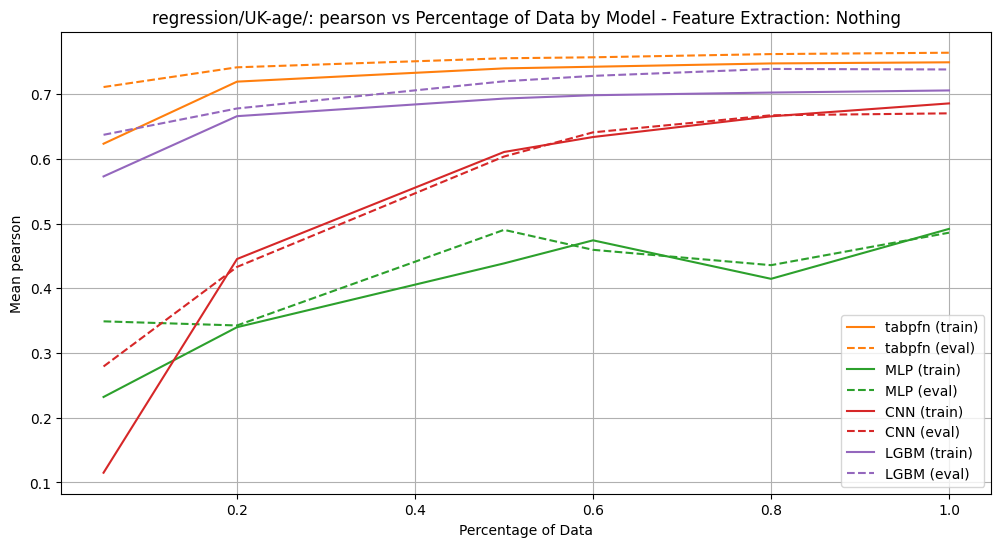

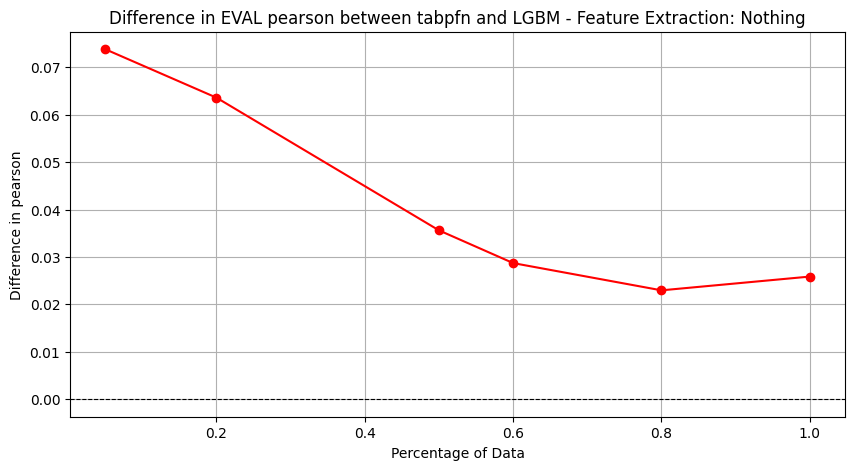

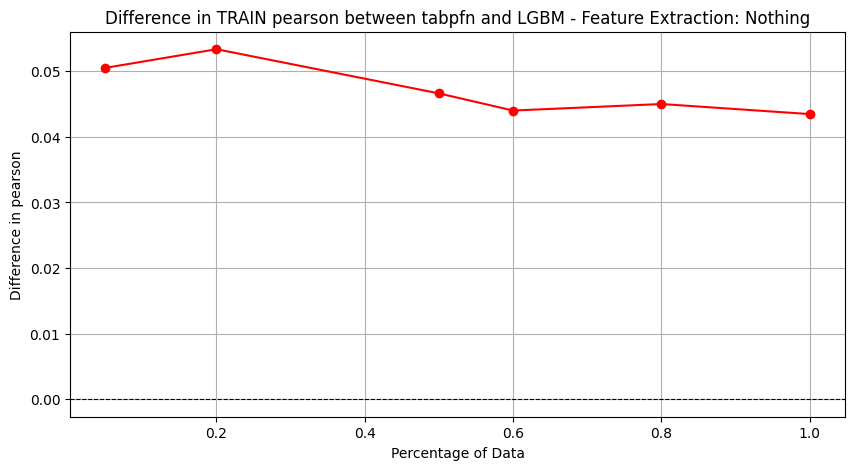

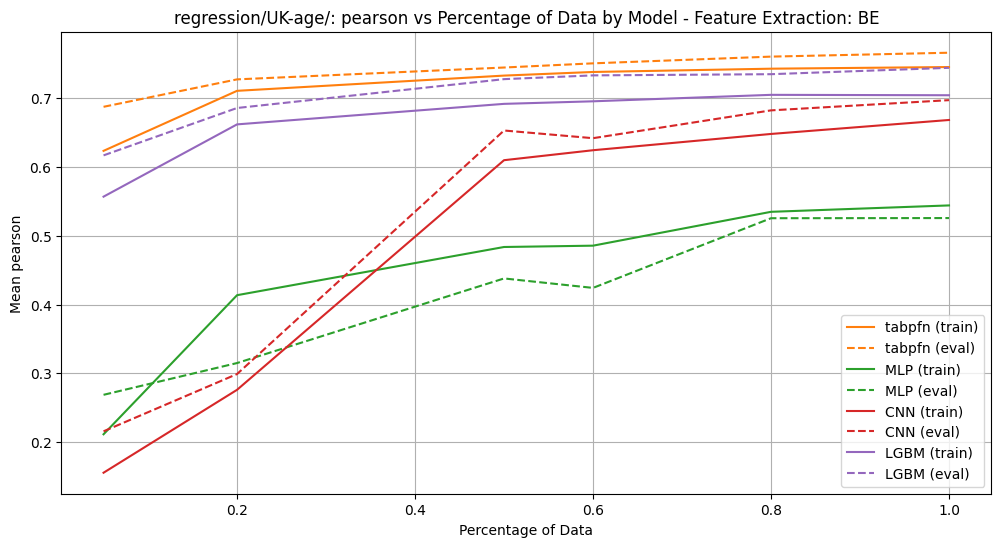

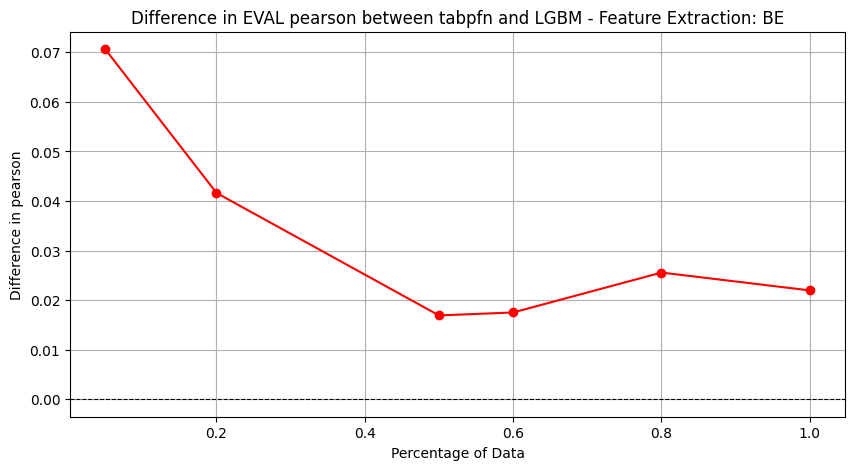

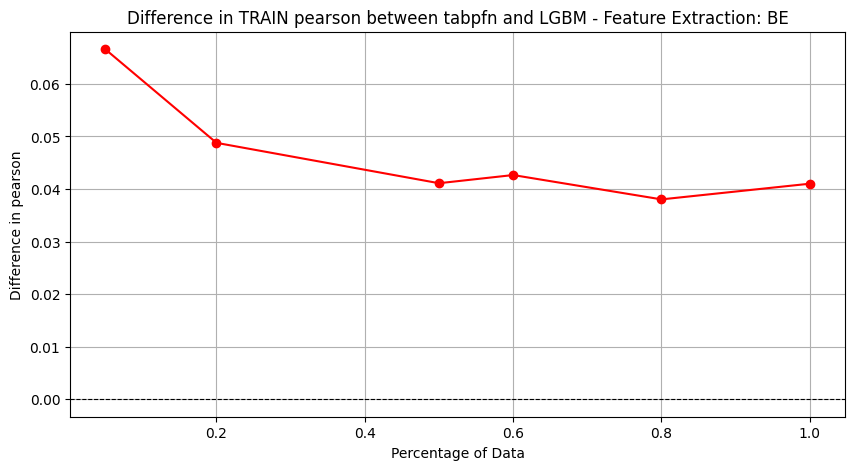

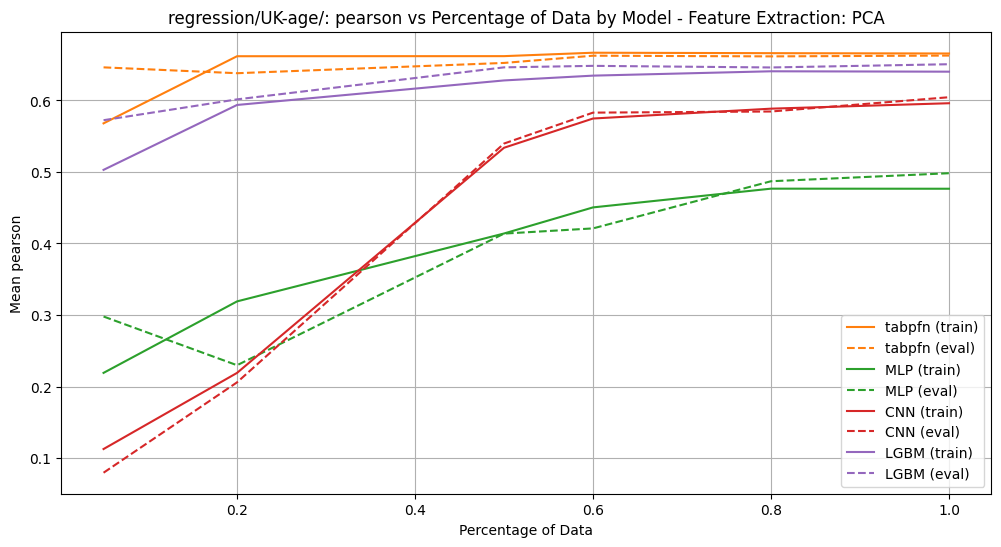

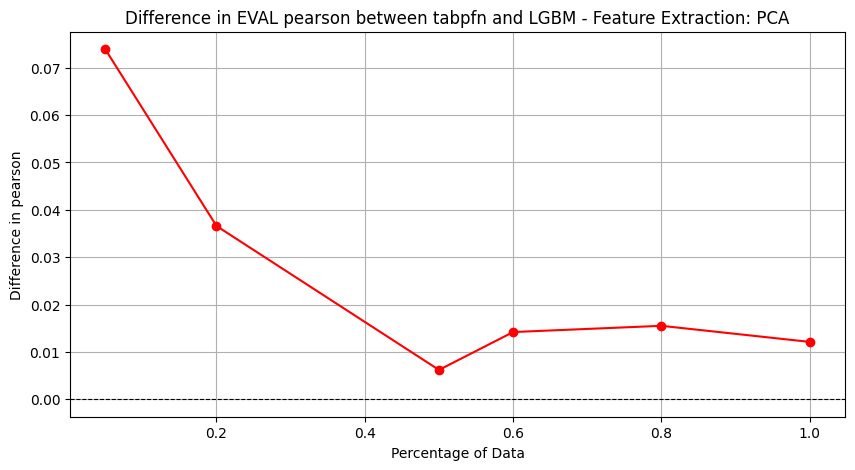

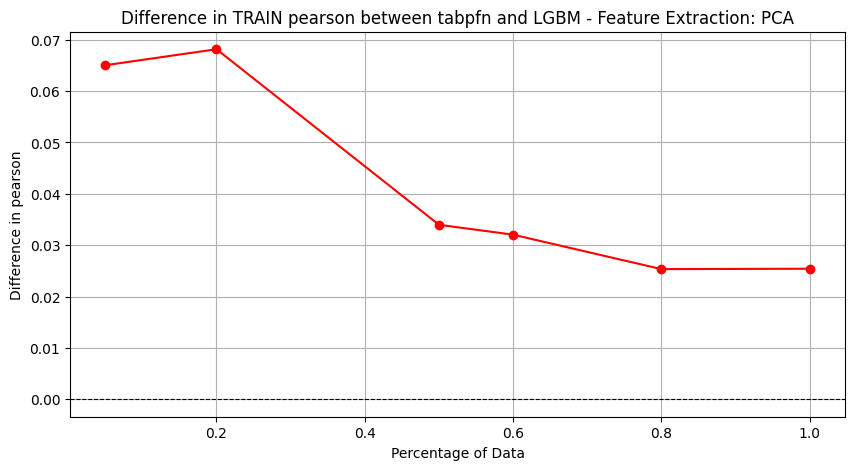

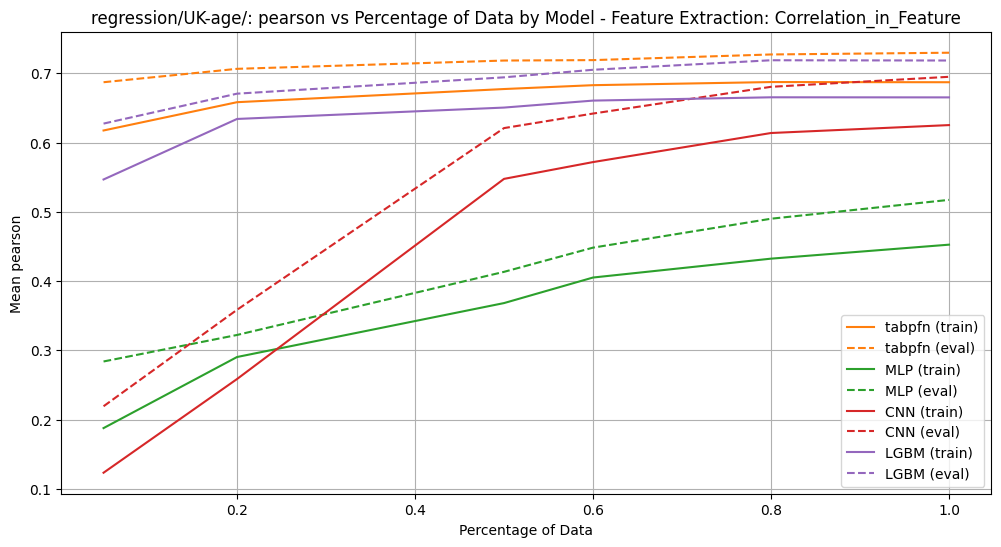

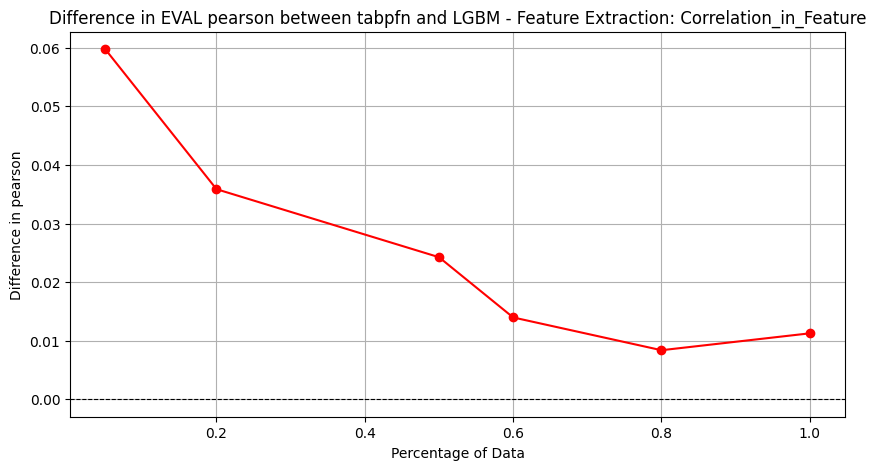

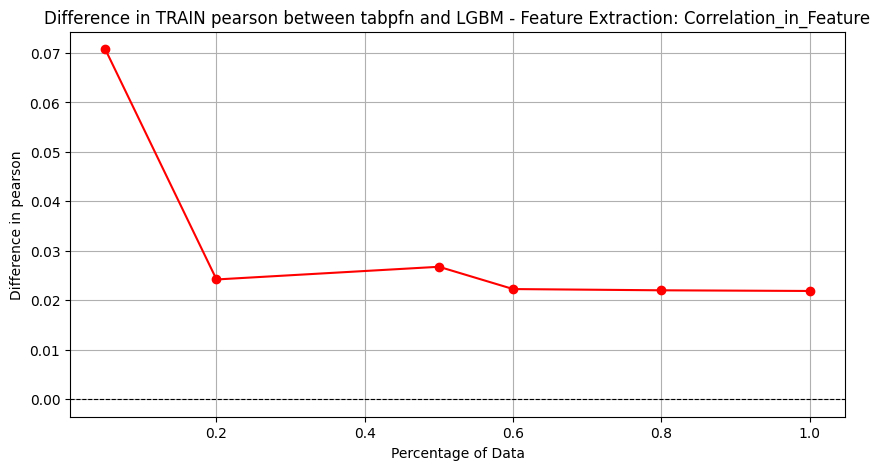

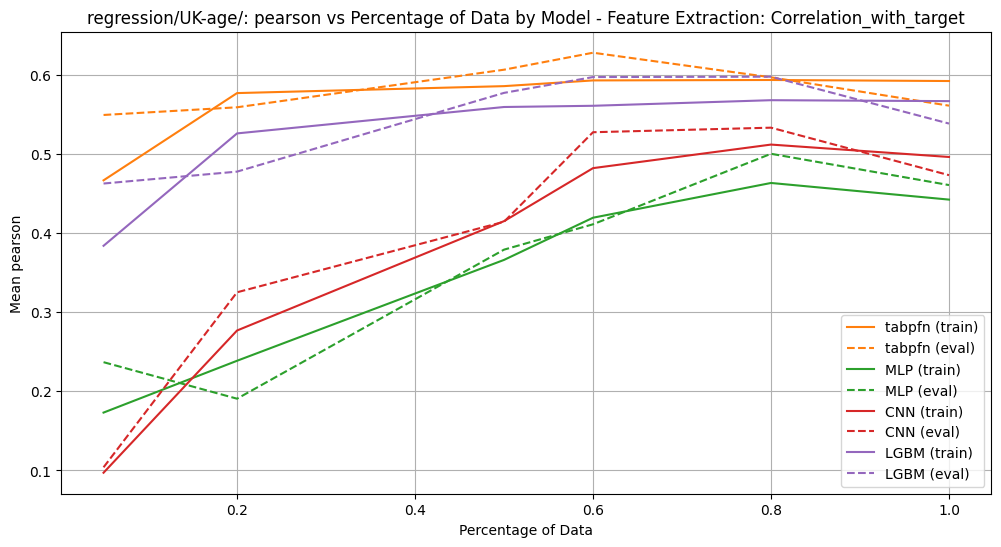

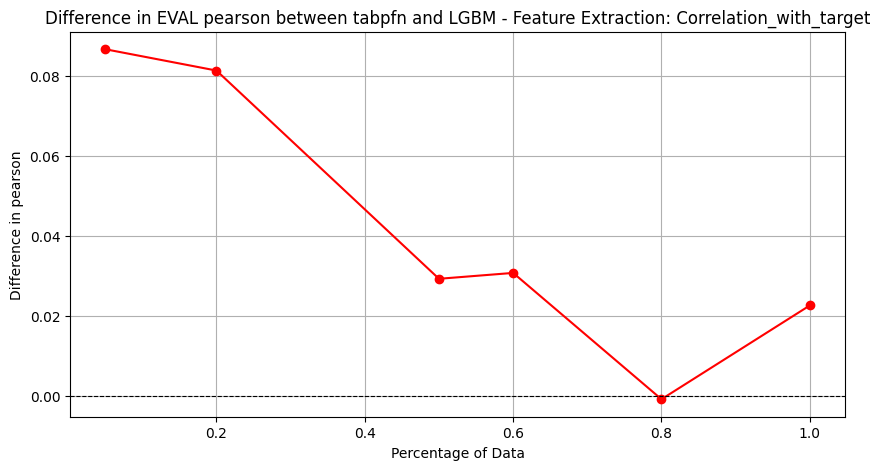

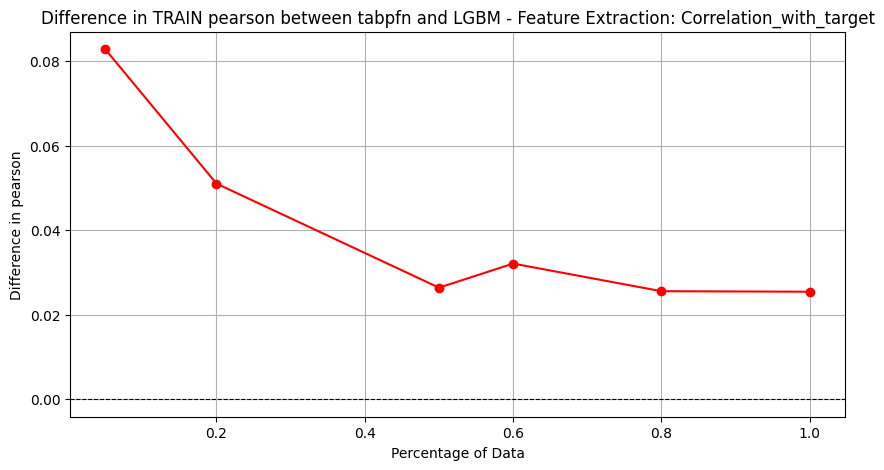

Best model train score: 0.7491529555081586 with search term: 1.0_Nothing_tabpfn_train
Best model eval score: 0.7663281123213033 with search term: 1.0_BE_tabpfn_eval


In [43]:

plot_metric_by_feature_extraction(df, models, metric='pearson', show_eval=True, compare_models=("tabpfn", "LGBM"), tag=tag)

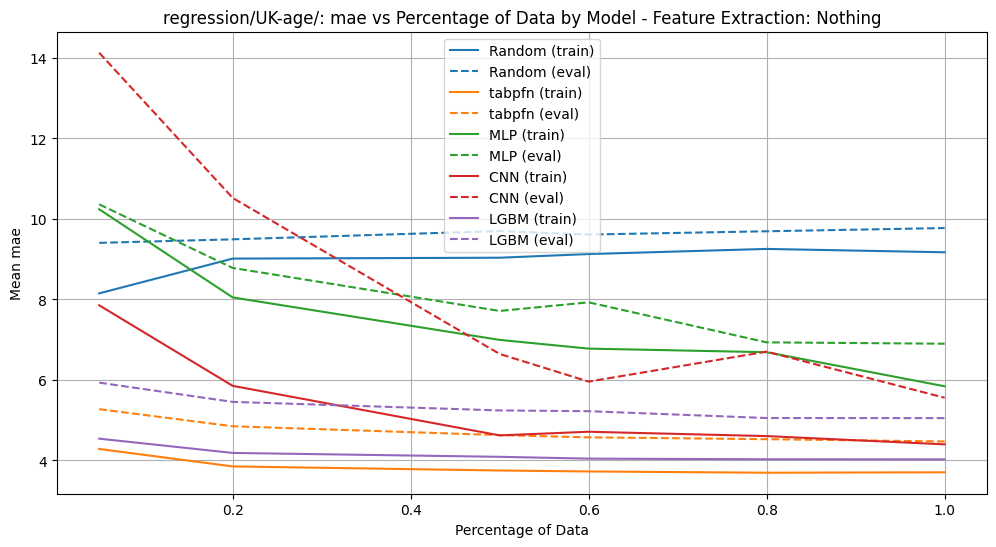

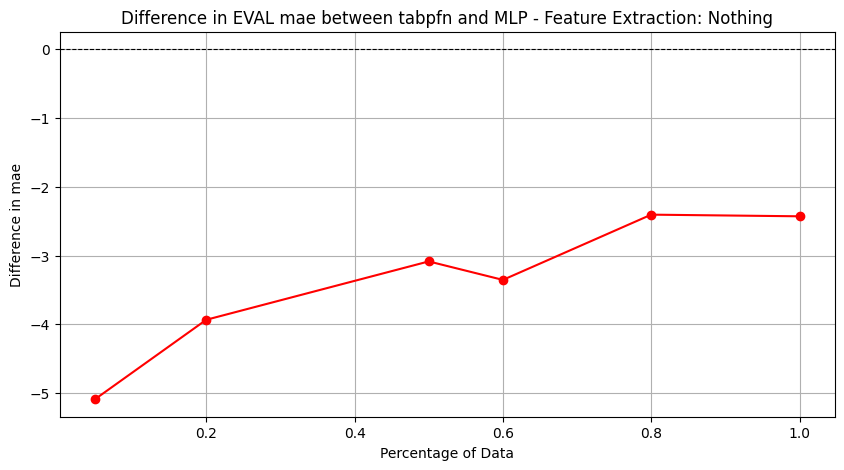

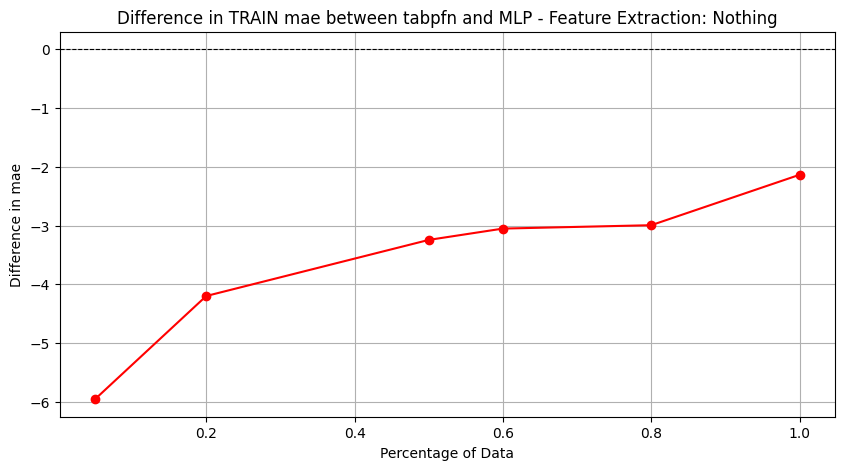

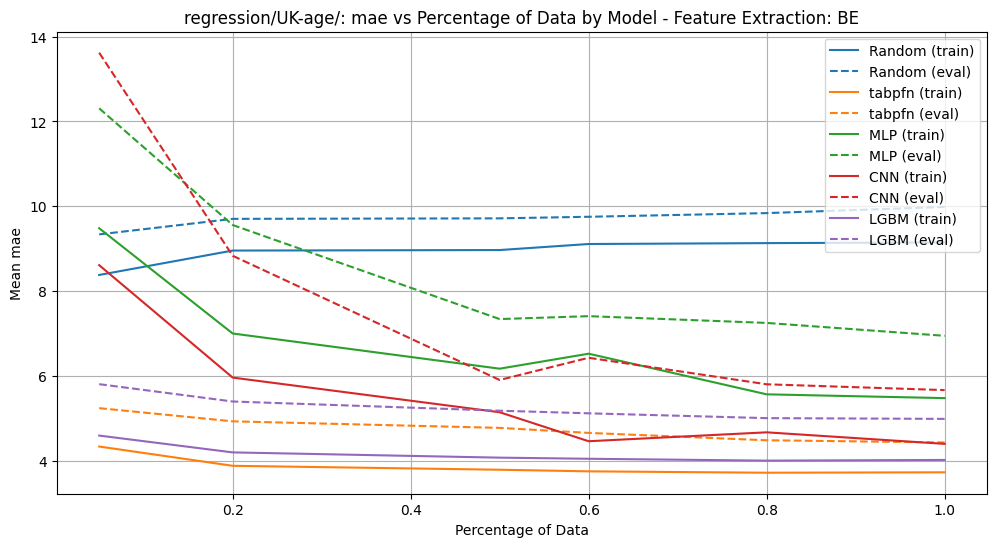

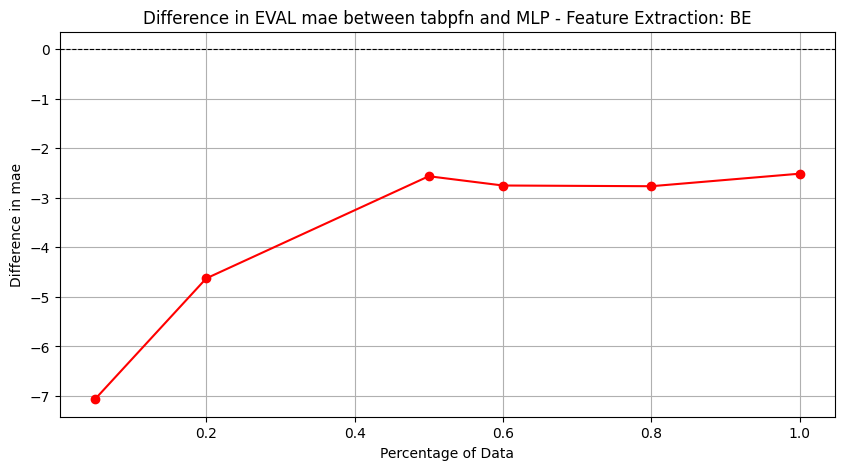

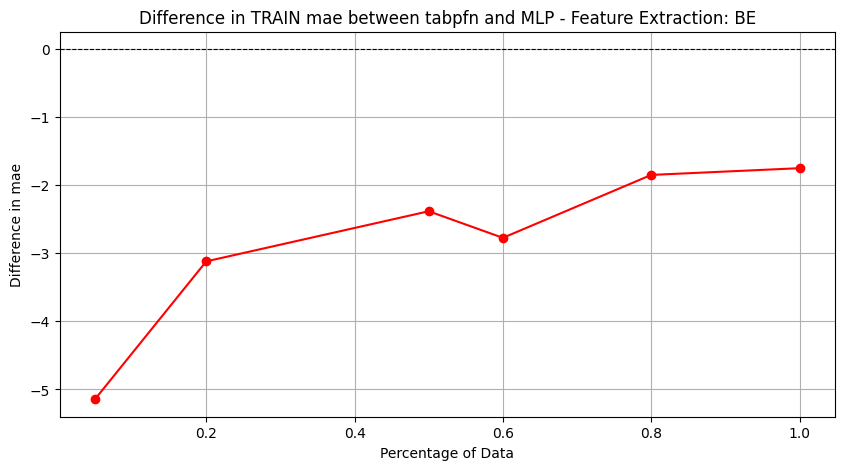

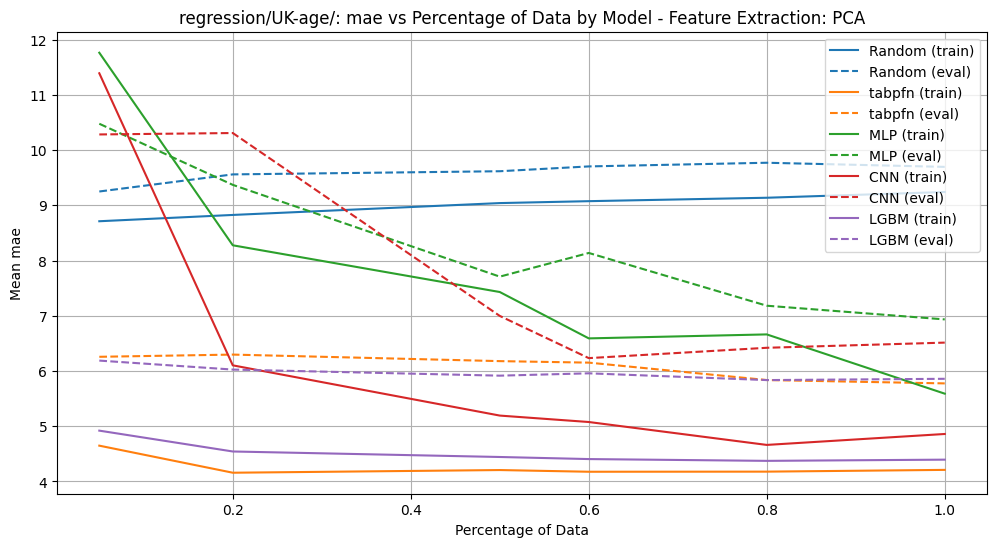

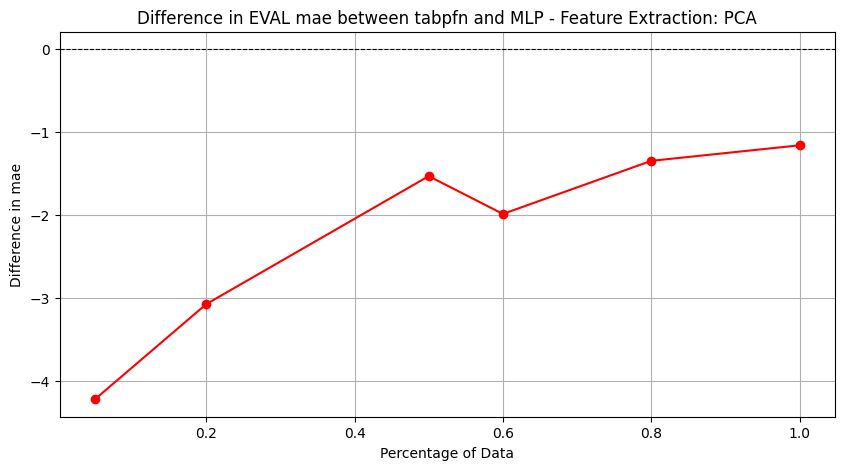

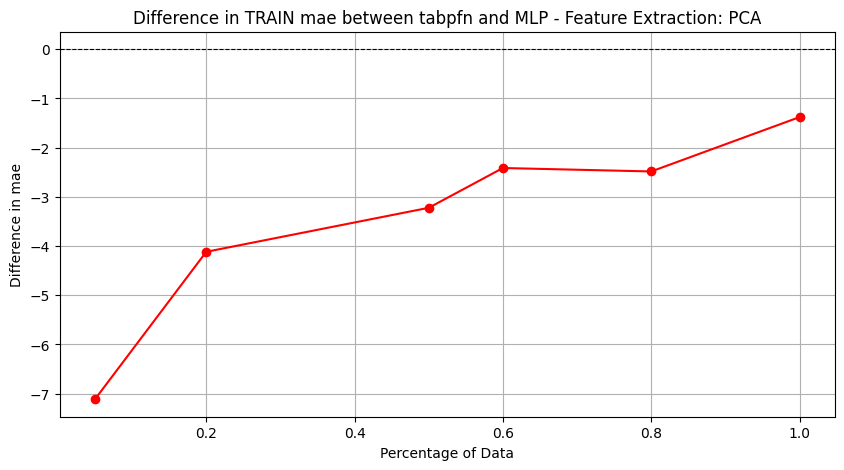

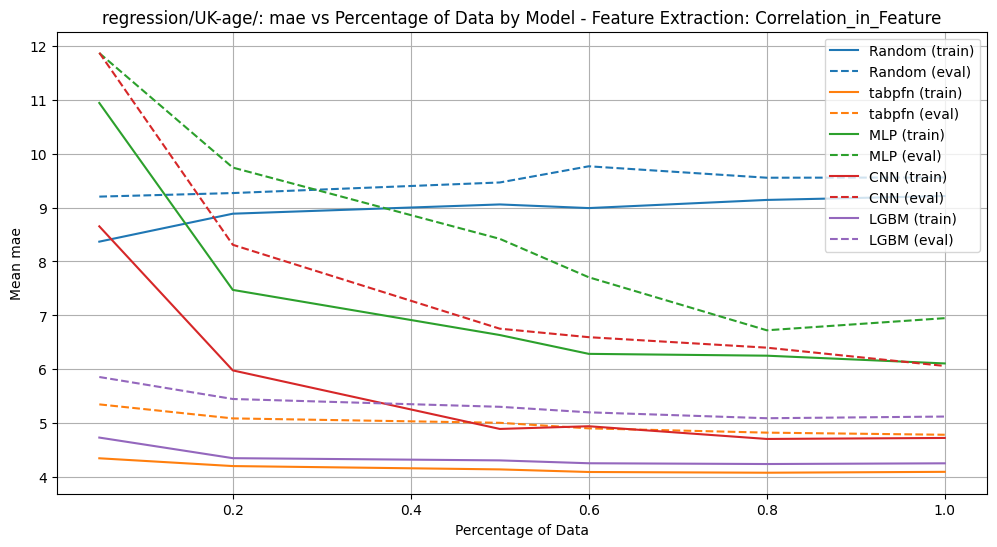

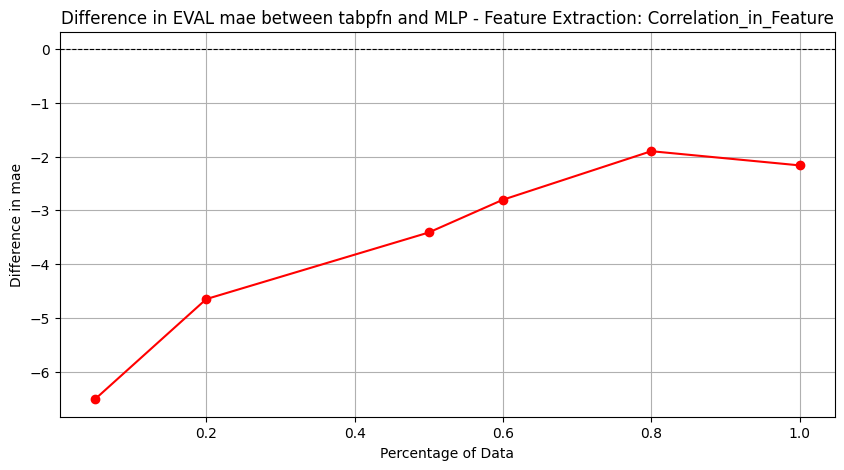

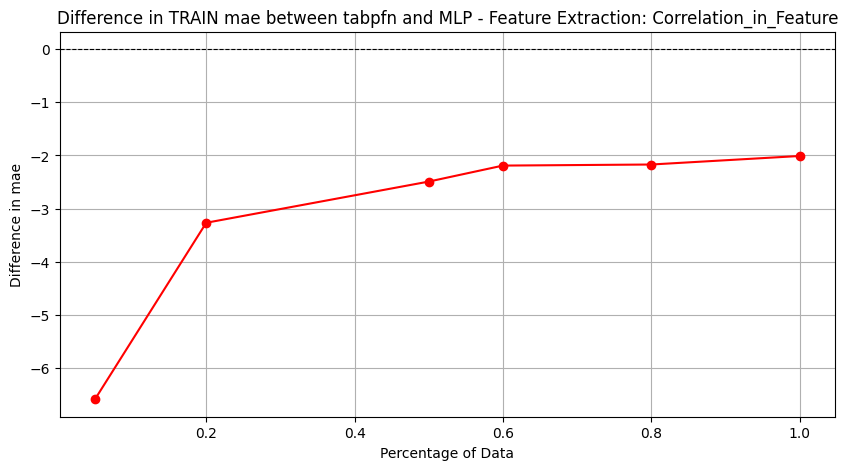

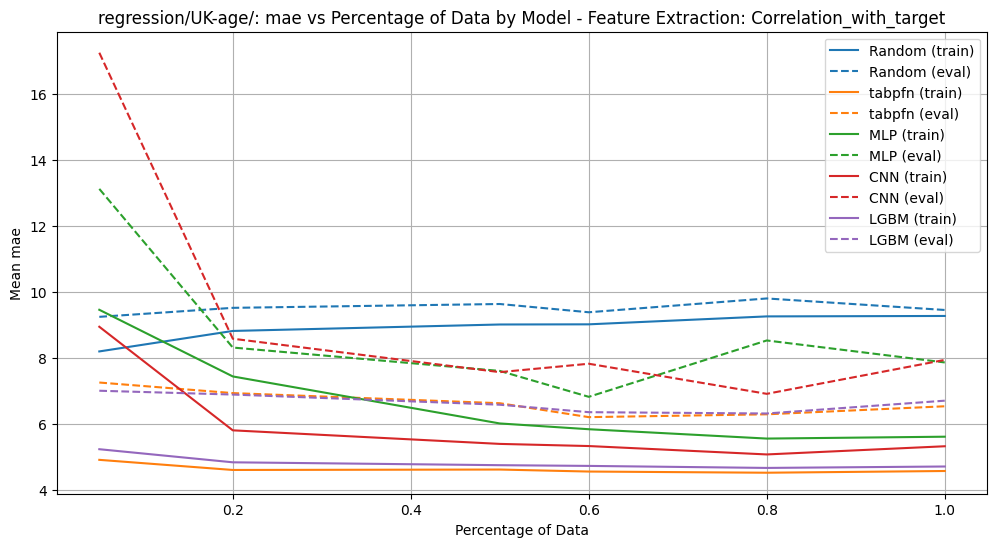

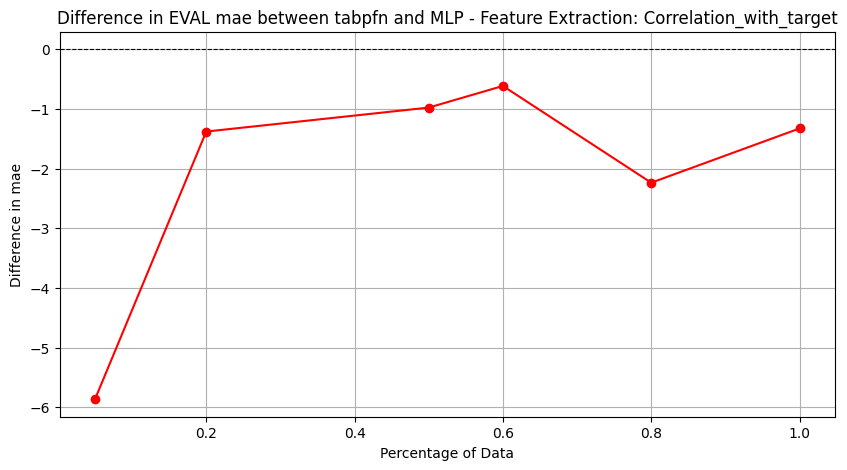

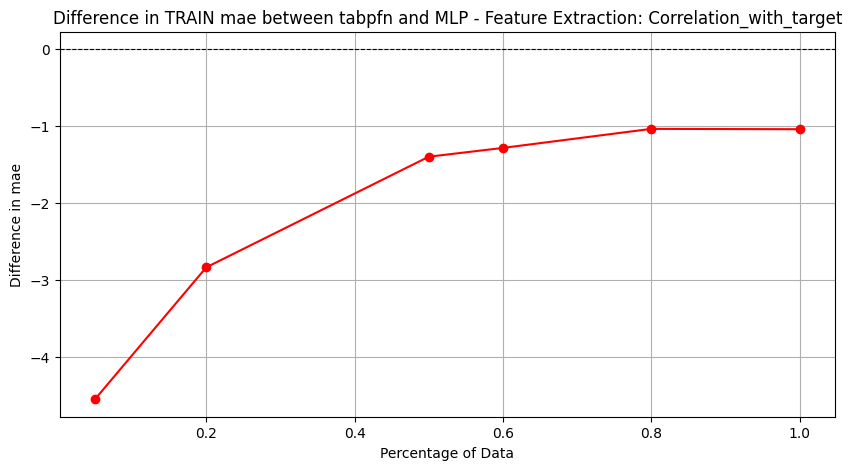

Best model train score: 3.693625 with search term: 0.8_Nothing_tabpfn_train
Best model eval score: 4.436 with search term: 1.0_BE_tabpfn_eval


In [44]:
plot_metric_by_feature_extraction(df, models, metric='mae', show_eval=True, show_train=True, show_random=True, compare_models=("tabpfn", "MLP"), tag=tag, maximise_metric=False)